In [35]:
import pandas as pd
import numpy as np
import seaborn as sns


In [36]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [37]:
df.describe()  #load summary of the data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [38]:
df.isnull().any() #check for null values

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

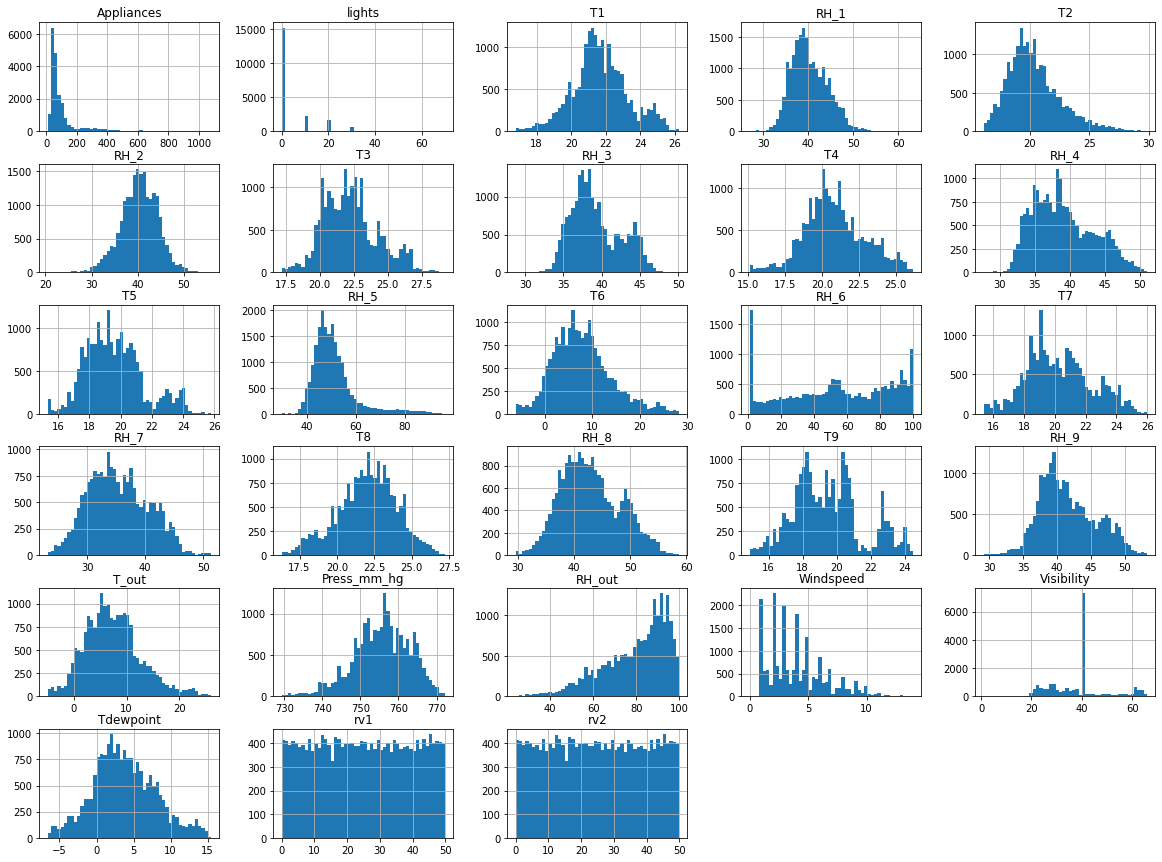

In [39]:
#numerical distribution of variables
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize= (20,15))
plt.savefig('attribute_histogram_plots')
plt.show()

In [40]:
#to make typing easier, make all column_names lowercased
df.columns= [x.lower() for x in df.columns]

In [60]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [44]:
#check for correlation and mking a heatmap
df.corr()
corrmap= df.corr()
top_corr_features= corrmap.index

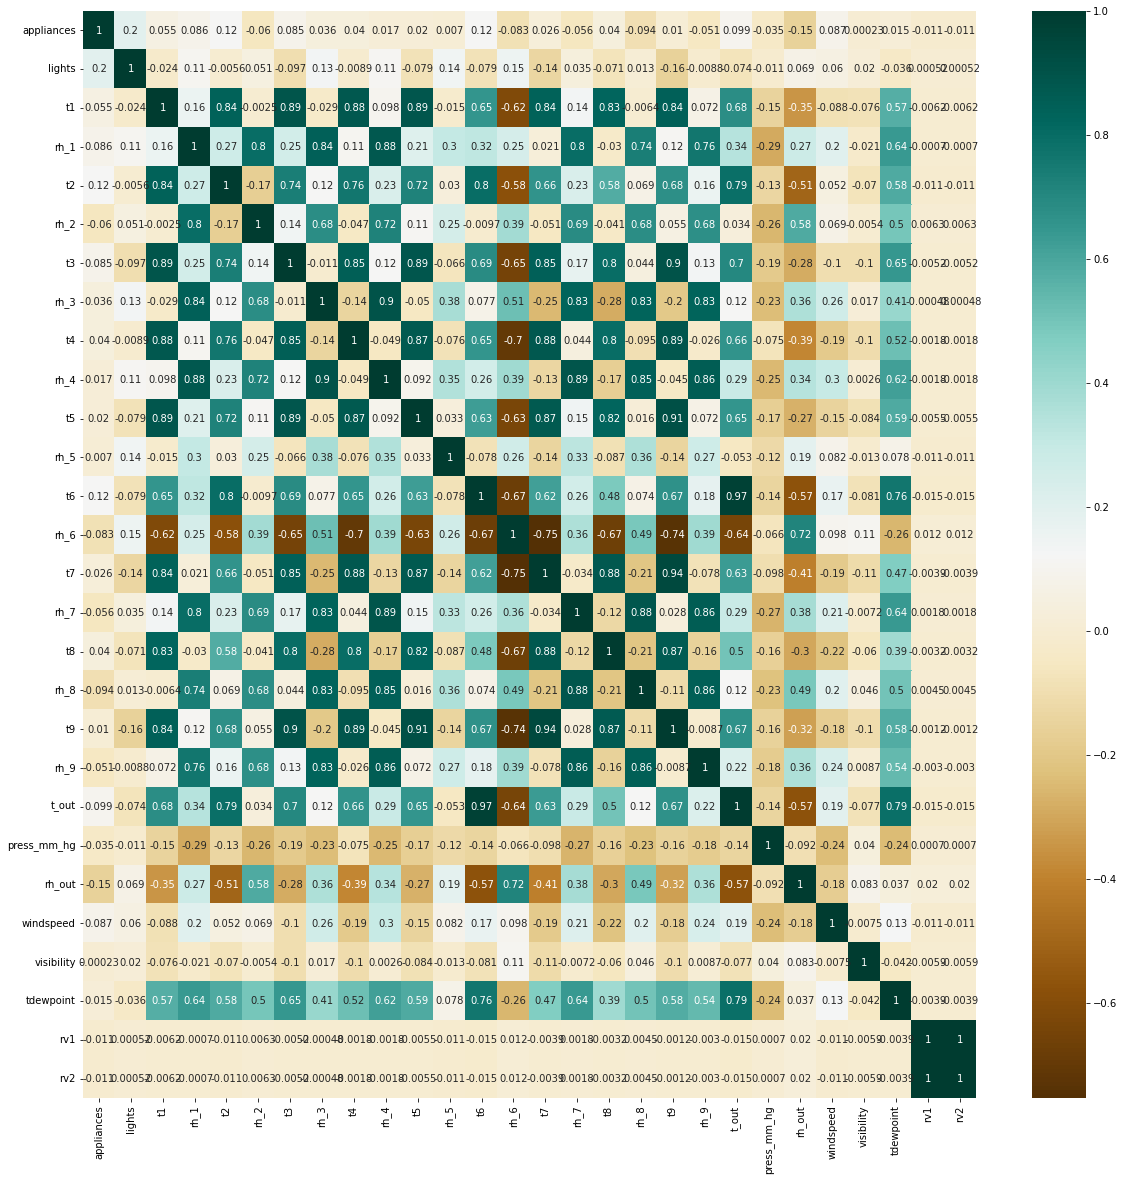

In [45]:
plt.figure(figsize= (20,20))
df_heatmap= sns.heatmap(df[top_corr_features].corr(), annot= True, cmap= 'BrBG')

In [46]:
simple_linear_reg_df = df[['lights', 'rv2']].sample(15, random_state=2)

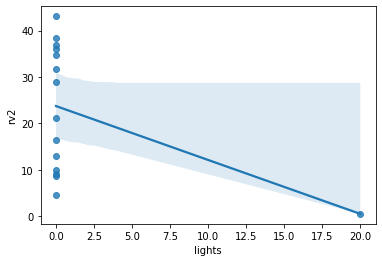

In [47]:
sns.regplot(x='lights',y='rv2', data= simple_linear_reg_df)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
normalised_df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
features_df= normalised_df.drop(columns= ['rv1','rv2'])
random_variable = normalised_df['rv1']

In [50]:
random_variable = normalised_df[ 'rv1' ]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
x_train,x_test,y_train, y_test = train_test_split (features_df, random_variable, test_size = 0.3, random_state = 1)


In [74]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

**MAE**

In [73]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3 )

0.252

**Residual Sum of Squares (RSS)**

In [53]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3 )

498.899

**Root Mean Square Error (RMSE) **

In [54]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.29

** R SQUARED aka Coefficient of Determination**

In [62]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,predicted_values)
round(r2_score,3)

-0.001

RIDGE REGULARISATION

In [65]:
#Ridge or L2 regularisation

from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha= 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [68]:
#CHECK IF RMSE CHANGES WHEN ALPHA VALUE IS CHANGED
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.29

LASSO REGULARISATION

In [69]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [70]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [71]:
linear_model_weights= get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df= get_weights_df(lasso_reg, x_train, 'Lasso_Weight')
final_weights= pd.merge(linear_model_weights, ridge_weights_df, on= 'Features')
final_weights= pd.merge(final_weights, lasso_weights_df, on= 'Features')
final_weights.describe()

,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
count,26.000000,26.000000,26.000000
mean,0.003380,0.002563,0.000048
std,0.055880,0.049087,0.000246
min,-0.108809,-0.087565,-0.000000
25%,-0.023817,-0.021424,0.000000
50%,-0.000825,-0.000943,-0.000000
75%,0.023512,0.022702,-0.000000
max,0.141646,0.109822,0.001253


In [72]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,tdewpoint,-0.108809,-0.087565,-0.000000
1,rh_2,-0.084937,-0.080840,-0.000000
2,t5,-0.068017,-0.065879,-0.000000
3,rh_9,-0.065370,-0.064526,-0.000000
4,t6,-0.025360,-0.020761,-0.000000
5,rh_5,-0.025194,-0.025496,-0.000000
6,t1,-0.024500,-0.025242,-0.000000
7,lights,-0.021766,-0.021645,-0.000000
8,t3,-0.013717,-0.013492,-0.000000
9,visibility,-0.013638,-0.013523,-0.000000


In [75]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.29